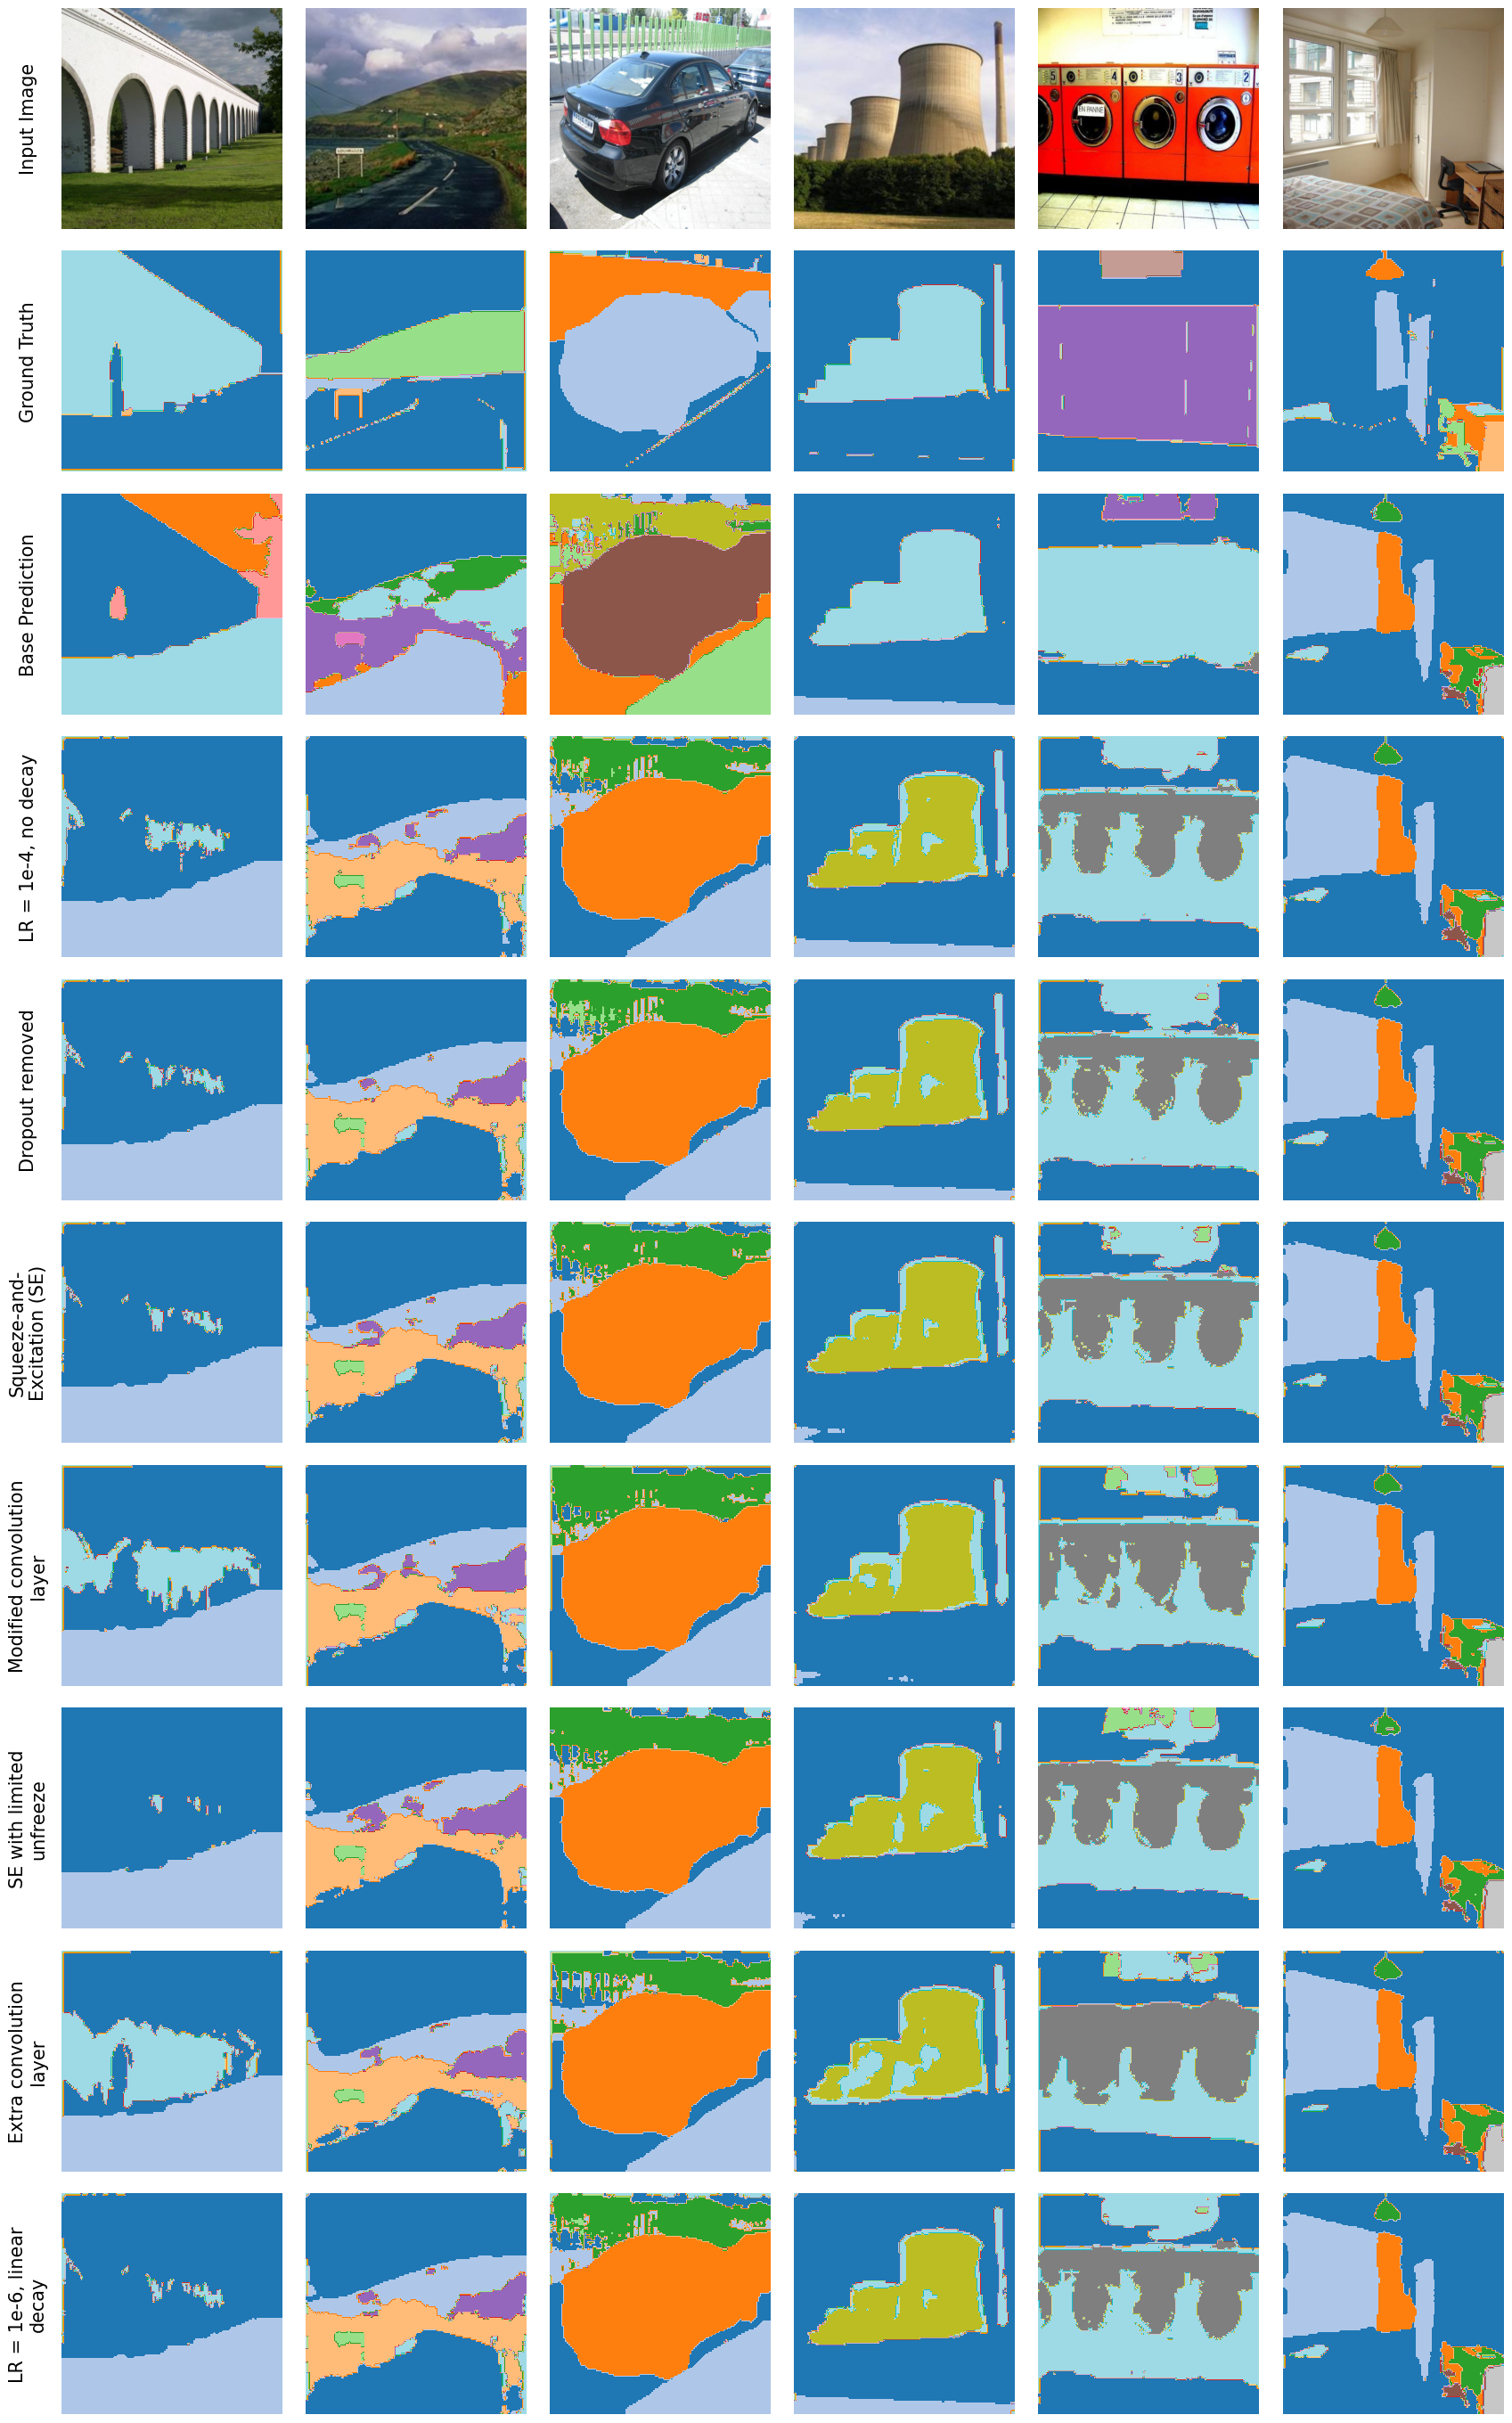

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from textwrap import fill
import json

with open("experiment_config.json", "r") as f:
    files = json.load(f)

max_width = 20
x_pos = -0.1

selected_indices = [26, 662, 834, 442, 1493, 174]
base_dir = "."

static_rows = ["image.png", "mask.png", "base.png"]
exp_rows = [(exp_id, "epoch_30.png", exp_name) for exp_id, exp_name in files.items()]
rows_total = len(static_rows) + len(exp_rows)

row_names = ["Input Image", "Ground Truth", "Base Prediction"] + list(files.values())

fig, axes = plt.subplots(rows_total, len(selected_indices),
                         figsize=(4 * len(selected_indices), 3 * rows_total))

if rows_total == 1:
    axes = axes[np.newaxis, :]
if len(selected_indices) == 1:
    axes = axes[:, np.newaxis]

for col, idx in enumerate(selected_indices):
    for r, img_name in enumerate(static_rows):
        img_path = os.path.join(base_dir, "01", "output", str(idx), img_name)
        ax = axes[r, col]
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img, cmap="tab20")
        ax.axis("off")

    for offset, (exp_id, target_img, exp_name) in enumerate(exp_rows, start=len(static_rows)):
        img_path = os.path.join(base_dir, exp_id, "output", str(idx), target_img)
        ax = axes[offset, col]
        if os.path.exists(img_path):
            img = Image.open(img_path)
            ax.imshow(img, cmap="tab20")
        ax.axis("off")

for r, label in enumerate(row_names):
    wrapped_label = fill(label, width=max_width)
    ax = axes[r, 0]
    y_center = 0.5
    ax.annotate(
        wrapped_label,
        xy=(-0.15, y_center),
        xycoords='axes fraction',
        ha='center',
        va='center',
        rotation=90,
        fontsize=15,
        linespacing=1.2,
        multialignment='center'
    )

plt.subplots_adjust(left=0.15, right=0.83, top=0.95, bottom=0.05, hspace=0.1, wspace=0.05)
plt.show()
